# 4. Spatio-temporal diversity of MICROVINIFICATION 

In [1]:
!mkdir /home/lfloerl/cloud/lfloerl/Microterroir/artifacts/ITS/lavaux/Fruit_to_Wine

mkdir: das Verzeichnis „/home/lfloerl/cloud/lfloerl/Microterroir/artifacts/ITS/lavaux/Fruit_to_Wine“ kann nicht angelegt werden: File exists


In [2]:
workdir = '/home/lfloerl/cloud/lfloerl/Microterroir/artifacts/ITS/lavaux/Fruit_to_Wine'
%cd $workdir

/home/lfloerl/cloud/lfloerl/Microterroir/artifacts/ITS/lavaux/Fruit_to_Wine


In [3]:
%env TMPDIR=/scratch/lfloerl/tmpdata

env: TMPDIR=/scratch/lfloerl/tmpdata


In [4]:
from qiime2 import Visualization
import qiime2 as q2
from qiime2 import Visualization
from skbio.stats.distance import permanova
from qiime2 import Artifact
from qiime2 import Metadata
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from qiime2.plugins.diversity.visualizers import alpha_group_significance
from skbio import DistanceMatrix
from qiime2.plugins import diversity as q2d
from qiime2.plugins.feature_table.methods import filter_samples, filter_features, filter_features_conditionally, relative_frequency
from qiime2.plugins.composition.methods import add_pseudocount, ancombc
from qiime2.plugins.composition.visualizers import tabulate, da_barplot
from qiime2.plugins.taxa.methods import collapse

%matplotlib inline

In [5]:
md = Metadata.load('/home/lfloerl/microterroir/Microbiome/Metadata/ITS_lavaux.tsv')
taxonomy = q2.Artifact.load('/home/lfloerl/cloud/lfloerl/Microterroir/artifacts/ITS/taxonomy.qza')

In [6]:
table = Artifact.load('/home/lfloerl/cloud/lfloerl/Microterroir/artifacts/ITS/projects/Lavaux_filtered_table.qza')

# get the berry and MV samples 
must_filtered_table, = filter_samples(table=table, metadata=md, where="[sample_type]='Post-AF' OR [sample_type]='Post-MLF' OR [sample_type]='MV-must' OR [sample_type]='must'")

must_filtered_table.save('fruit_to_wine_filtered_table.qza')
!qiime feature-table summarize --i-table fruit_to_wine_filtered_table.qza --o-visualization fruit_to_wine_filtered_table.qzv

/scratch/lfloerl/.condaenvs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/qiime2/metadata/metadata.py:610: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  series[missing.index] = missing


Saved Visualization to: fruit_to_wine_filtered_table.qzv


In [26]:
%%bash 

qiime feature-table filter-seqs \
        --i-data /home/lfloerl/cloud/lfloerl/Microterroir/artifacts/Sven-denoising-test/ITS/revcomp-trimmed-denoised/with-adjusted-parameters/ITS-revcomp-trimmed-ER-0.05-denoised-trunc-190-PFA-4.0-maxee-4.0-rep-seqs.qza \
        --i-table fruit_to_wine_filtered_table.qza \
        --o-filtered-data fruit_to_wine_filtered_rep_seqs.qza

Saved FeatureData[Sequence] to: fruit_to_wine_filtered_rep_seqs.qza


Depth: 

* 4500: Retained 1’980’000 (13.40%) features in 440 (96.92%) samples

In [ ]:
Visualization.load('fruit_to_wine_filtered_table.qzv')

<visualization: Visualization uuid: 235a27a3-b41a-466d-8ca9-a7d3b97f6c0a>

# Diversity

In [15]:
%%bash 
# Core diversity metrics
qiime diversity core-metrics \
        --i-table fruit_to_wine_filtered_table.qza \
        --p-sampling-depth 4500 \
        --m-metadata-file /home/lfloerl/microterroir/Microbiome/Metadata/ITS_lavaux.tsv \
        --p-n-jobs 2 \
        --output-dir cm4500/

# Kmer diversity
qiime kmerizer core-metrics \
    --i-sequences fruit_to_wine_filtered_rep_seqs.qza \
    --i-table fruit_to_wine_filtered_table.qza \
    --p-sampling-depth 4500 \
    --m-metadata-file /home/lfloerl/microterroir/Microbiome/Metadata/ITS_lavaux.tsv \
    --p-n-jobs 'auto' \
    --output-dir kmer_cm4500/

Saved FeatureTable[Frequency] to: cm4500/rarefied_table.qza
Saved SampleData[AlphaDiversity] to: cm4500/observed_features_vector.qza
Saved SampleData[AlphaDiversity] to: cm4500/shannon_vector.qza
Saved SampleData[AlphaDiversity] to: cm4500/evenness_vector.qza
Saved DistanceMatrix to: cm4500/jaccard_distance_matrix.qza
Saved DistanceMatrix to: cm4500/bray_curtis_distance_matrix.qza
Saved PCoAResults to: cm4500/jaccard_pcoa_results.qza
Saved PCoAResults to: cm4500/bray_curtis_pcoa_results.qza
Saved Visualization to: cm4500/jaccard_emperor.qzv
Saved Visualization to: cm4500/bray_curtis_emperor.qzv
Saved FeatureTable[Frequency] to: kmer_cm4500/rarefied_table.qza
Saved FeatureTable[Frequency] to: kmer_cm4500/kmer_table.qza
Saved SampleData[AlphaDiversity] to: kmer_cm4500/observed_features_vector.qza
Saved SampleData[AlphaDiversity] to: kmer_cm4500/shannon_vector.qza
Saved DistanceMatrix to: kmer_cm4500/jaccard_distance_matrix.qza
Saved DistanceMatrix to: kmer_cm4500/bray_curtis_distance_mat

# Alpha Diversity

In [16]:
# Define the input artifact paths for alpha diversity metrics
alpha_metrics = {
    'shannon_vector': 'cm4500/shannon_vector.qza',
    'observed_features_vector': 'cm4500/observed_features_vector.qza',
    'evenness_vector': 'cm4500/evenness_vector.qza'}
output_dir = 'cm4500/'

metadata = Metadata.load('/home/lfloerl/microterroir/Microbiome/Metadata/ITS_lavaux.tsv')

for m, path in alpha_metrics.items():
    alpha_div = Artifact.load(path)
    ags, = alpha_group_significance(alpha_diversity=alpha_div, metadata=metadata)
    ags.save(f'{output_dir}alpha_groupSig_{m}.qzv')

/scratch/lfloerl/.condaenvs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/q2_types/sample_data/_deferred_setup/_transformers.py:28: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[cols] = df[cols].apply(pd.to_numeric, errors='ignore')
/scratch/lfloerl/.condaenvs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/q2_types/sample_data/_deferred_setup/_transformers.py:28: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[cols] = df[cols].apply(pd.to_numeric, errors='ignore')
/scratch/lfloerl/.condaenvs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/q2_types/sample_data/_deferred_setup/_transformers.py:28: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions

In [ ]:
Visualization.load('alpha_groupSig_evenness_vector.qzv')

In [18]:
!qiime tools export --input-path cm4500/observed_features_vector.qza --output-path cm4500/observed_features_vector
!qiime tools export --input-path cm4500/shannon_vector.qza --output-path cm4500/shannon_vector
!qiime tools export --input-path cm4500/evenness_vector.qza --output-path cm4500/evenness_vector

Exported cm4500/observed_features_vector.qza as AlphaDiversityDirectoryFormat to directory cm4500/observed_features_vector
Exported cm4500/shannon_vector.qza as AlphaDiversityDirectoryFormat to directory cm4500/shannon_vector
Exported cm4500/evenness_vector.qza as AlphaDiversityDirectoryFormat to directory cm4500/evenness_vector


In [10]:
# import 
ObsFeatures_df = pd.read_csv('cm4500/observed_features_vector/alpha-diversity.tsv', sep='\t')
Shannon_df = pd.read_csv('cm4500/shannon_vector/alpha-diversity.tsv', sep='\t')
Evenness_df = pd.read_csv('cm4500/evenness_vector/alpha-diversity.tsv', sep='\t') 

# metadata
md_df = pd.read_csv('/home/lfloerl/microterroir/Microbiome/Metadata/ITS_lavaux.tsv', sep='\t')
md_subset = md_df[['id', 'sample_type']]

# merge
alpha_df = ObsFeatures_df.merge(Shannon_df, on='Unnamed: 0').merge(Evenness_df, on='Unnamed: 0')
alpha_df_wMD = alpha_df.merge(md_subset, left_on='Unnamed: 0', right_on='id')
alpha_df_wMD.drop(columns='Unnamed: 0', inplace=True)

# rename the sample types
alpha_df_wMD['sample_type'] = alpha_df_wMD['sample_type'].replace({'must': 'berries', 'MV-must': 'must'})

alpha_df_wMD.tail()

,observed_features,shannon_entropy,pielou_evenness,id,sample_type
435,11,1.676492,0.484615,364526_570-LP3-ITS-1146,Post-MLF
436,68,4.151268,0.681937,364526_571-LP3-ITS-1147,must
437,11,1.599453,0.462346,364526_572-LP3-ITS-1148,Post-MLF
438,47,3.893506,0.700953,364526_573-LP3-ITS-1149,must
439,12,1.650410,0.460370,364526_574-LP3-ITS-1150,Post-MLF


/scratch/lfloerl/tmpdata/ipykernel_101618/2709662582.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  box = sns.violinplot(
/scratch/lfloerl/tmpdata/ipykernel_101618/2709662582.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  box = sns.violinplot(
/scratch/lfloerl/tmpdata/ipykernel_101618/2709662582.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  box = sns.violinplot(


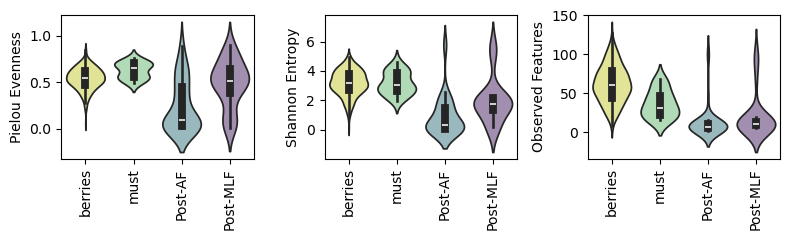

In [27]:
# Define colors 
sample_colors = {'berries': '#DCE318FF', 
                 'must': '#56C667FF', 
                 'Post-AF': '#287D8EFF', 
                 'Post-MLF': '#481568FF'}

# List of columns to plot
columns_to_plot = ['pielou_evenness', 'shannon_entropy', 'observed_features']

fig, axes = plt.subplots(1, 3, figsize=(8, 2.5), sharey=False)

# Adjust horizontal spacing between subplots
plt.subplots_adjust(wspace=1.2)  # Increase wspace for more padding

# order for sample types
ordered_sample_types = ['berries', 'must', 'Post-AF', 'Post-MLF']

# Create violin plots
for ax, col in zip(axes, columns_to_plot):
    box = sns.violinplot(
        data=alpha_df_wMD,
        x='sample_type',
        y=col,
        palette=sample_colors,
        ax=ax,
        order=ordered_sample_types  # Sort the sample types in the specified order
    )
    ax.set_xlabel('')
    ax.set_ylabel(col.replace("_", " ").title())  
    ax.tick_params(axis='x', rotation=90)

    for collection in box.collections:
        facecolor = collection.get_facecolor()
        # Set new facecolor with transparency (alpha)
        collection.set_facecolor((facecolor[0][0], facecolor[0][1], facecolor[0][2], 0.5))

# Adjust layout
plt.tight_layout()

plt.savefig('/home/lfloerl/cloud/lfloerl/Microterroir/Figures/FruitToMust_Alpha_Violin_Plots.png', dpi=1000, bbox_inches='tight')
plt.show()


# Beta diversity

In [64]:
!qiime tools export --input-path cm4500/jaccard_pcoa_results.qza --output-path cm4500/jaccard_pcoa_results
!qiime tools export --input-path cm4500/bray_curtis_pcoa_results.qza --output-path cm4500/bray_curtis_pcoa_results
!qiime tools export --input-path kmer_cm4500/jaccard_pcoa_results.qza --output-path kmer_cm4500/jaccard_pcoa_results
!qiime tools export --input-path kmer_cm4500/bray_curtis_pcoa_results.qza --output-path kmer_cm4500/bray_curtis_pcoa_results

Exported cm4500/jaccard_pcoa_results.qza as OrdinationDirectoryFormat to directory cm4500/jaccard_pcoa_results
Exported cm4500/bray_curtis_pcoa_results.qza as OrdinationDirectoryFormat to directory cm4500/bray_curtis_pcoa_results
Exported kmer_cm4500/jaccard_pcoa_results.qza as OrdinationDirectoryFormat to directory kmer_cm4500/jaccard_pcoa_results
Exported kmer_cm4500/bray_curtis_pcoa_results.qza as OrdinationDirectoryFormat to directory kmer_cm4500/bray_curtis_pcoa_results


In [12]:
# reimport 
bc_pcoa = pd.read_csv('cm4500/bray_curtis_pcoa_results/ordination.txt', sep='\t', skiprows=9, header=None)
jaccard_pcoa = pd.read_csv('cm4500/jaccard_pcoa_results/ordination.txt', sep='\t', skiprows=9, header=None)
bc_kmer_pcoa = pd.read_csv('kmer_cm4500/bray_curtis_pcoa_results/ordination.txt', sep='\t', skiprows=9, header=None)
jaccard__kmer_pcoa = pd.read_csv('kmer_cm4500/jaccard_pcoa_results/ordination.txt', sep='\t', skiprows=9, header=None)


# function to get components 
def select_components(df):
    # Drop the last 2 rows
    df = df.iloc[:-2]
    # Select specific columns
    df = df.iloc[:, [0, 1, 2]]
    # Rename columns and set index
    df = df.rename(columns={0: 'ID', 1: 'PC1', 2: 'PC2'}).set_index('ID')
    return df

bc_pcoa_df = select_components(bc_pcoa)
jaccard_pcoa_df = select_components(jaccard_pcoa)
bc_pcoa_kmer_df = select_components(bc_kmer_pcoa)
jaccard_pcoa_kmer_df = select_components(jaccard__kmer_pcoa)

In [14]:
md = pd.read_csv('/home/lfloerl/microterroir/Microbiome/Metadata/ITS_lavaux.tsv', sep='\t', index_col=0)
md['sample_type'] = md['sample_type'].replace({'must': 'berries', 'MV-must': 'must'})

# merge with metadata
bc_pcoa_df_merged = bc_pcoa_df.merge(md, left_on='ID', right_on='id', how='left')
jaccard_pcoa_df_merged = jaccard_pcoa_df.merge(md, left_on='ID', right_on='id', how='left')
bc_pcoa_kmer_df_merged = bc_pcoa_kmer_df.merge(md, left_on='ID', right_on='id', how='left')
jaccard_pcoa_kmer_df_merged = jaccard_pcoa_kmer_df.merge(md, left_on='ID', right_on='id', how='left')

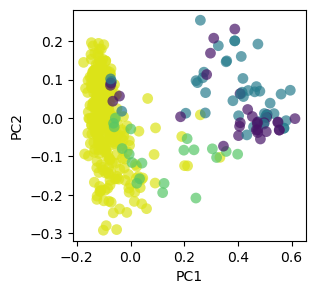

In [18]:
plt.figure(figsize=(3, 3)) 
sns.scatterplot(
    x='PC1', y='PC2',
    data=jaccard_pcoa_df_merged,
    hue='sample_type',
    palette=sample_colors,  
    s=60, edgecolor='none', alpha=0.7, legend=False)
plt.xlabel('PC1')
plt.ylabel('PC2')
#plt.title('Jaccard')

plt.savefig('/home/lfloerl/cloud/lfloerl/Microterroir/Figures/FruitToMust_Jaccard.png', dpi=1000, bbox_inches='tight')

plt.show()

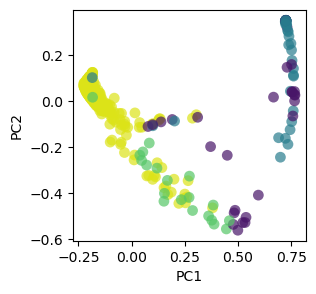

In [19]:
plt.figure(figsize=(3, 3)) 
sns.scatterplot(
    x='PC1', y='PC2',
    data=bc_pcoa_df_merged,
    hue='sample_type',
    palette=sample_colors,  
    s=60, edgecolor='none', alpha=0.7, legend=False)
plt.xlabel('PC1')
plt.ylabel('PC2')
#plt.title('Bray Curtis')

plt.savefig('/home/lfloerl/cloud/lfloerl/Microterroir/Figures/FruitToMust_BrayCurtis.png', dpi=1000, bbox_inches='tight')

plt.show()

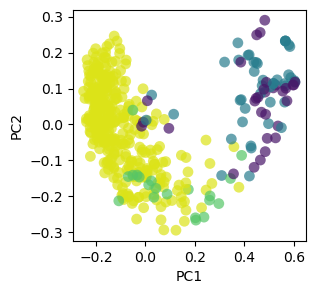

In [20]:
plt.figure(figsize=(3, 3)) 
sns.scatterplot(
    x='PC1', y='PC2',
    data=jaccard_pcoa_kmer_df_merged,
    hue='sample_type',
    palette=sample_colors,  
    s=60, edgecolor='none', alpha=0.7, legend=False)
plt.xlabel('PC1')
plt.ylabel('PC2')
#plt.title('Jaccard (kmer)')
plt.savefig('/home/lfloerl/cloud/lfloerl/Microterroir/Figures/FruitToMust_JaccardKmer.png', dpi=1000, bbox_inches='tight')

plt.show()

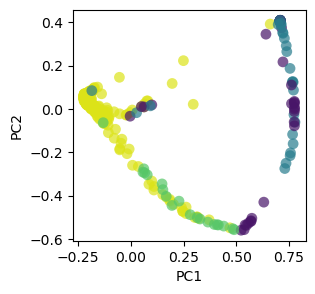

In [22]:
plt.figure(figsize=(3, 3)) 
sns.scatterplot(
    x='PC1', y='PC2',
    data=bc_pcoa_kmer_df_merged,
    hue='sample_type',
    palette=sample_colors,  
    s=60, edgecolor='none', alpha=0.7, legend=False)
plt.xlabel('PC1')
plt.ylabel('PC2')
#plt.title('Bray Curtis (kmer)')
plt.savefig('/home/lfloerl/cloud/lfloerl/Microterroir/Figures/FruitToMust_BrayCurtisKmer.png', dpi=1000, bbox_inches='tight')

plt.show()

# Differential Abundance

In [7]:
md = Metadata.load('/home/lfloerl/microterroir/Microbiome/Metadata/ITS_lavaux.tsv')
must_filtered_table = Artifact.load('fruit_to_wine_filtered_table.qza')

In [8]:
filtered_table, = filter_features(must_filtered_table, min_frequency = 5, min_samples = 1)
taxa_table, = collapse(table=filtered_table, taxonomy=taxonomy, level=7)
ancom, = ancombc(table=taxa_table, metadata=md, formula='sample_type')
ancom_table, = tabulate(data=ancom)
ancom_table 

/scratch/lfloerl/.condaenvs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/q2_composition/_ancombc.py:77: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  term_alpha_value = (metadata.get_column(term)


Running external command line application(s). This may print messages to stdout and/or stderr.
The command(s) being run are below. These commands cannot be manually re-run as they will depend on temporary files that no longer exist.

Command: run_ancombc.R --inp_abundances_path /scratch/lfloerl/tmpdata/tmph0pnnpg7/input.biom.tsv --inp_metadata_path /scratch/lfloerl/tmpdata/tmph0pnnpg7/input.map.txt --md_column_types {"SAMPLE_NAME": "categorical", "Fungal conc. (ng/uL)": "numeric", "Collection_ID": "categorical", "sample_type": "categorical", "Plot_ID": "categorical", "COLLECTION_DATE": "categorical", "Replicate": "categorical", "Time_point": "categorical", "Year": "numeric", "Year_Cat": "categorical", "Plot": "numeric", "Altitude": "numeric", "Average_slope": "numeric", "Exposition": "categorical", "Min_radiation": "numeric", "Max_radiation": "numeric", "Average_radiation": "numeric", "Soil_thickness": "categorical", "Soil_type": "categorical", "Soil_depth": "categorical", "Hydromorphi

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attache Paket: ‘jsonlite’

Das folgende Objekt ist maskiert ‘package:purrr’:

    flatten

New names:
• `` -> `...1`


R version 4.3.3 (2024-02-29) 


'ancombc' has been fully evolved to 'ancombc2'. 
Explore the enhanced capabilities of our refined method!
Lade nötiges Paket: foreach

Attache Paket: ‘foreach’

Die folgenden Objekte sind maskiert von ‘package:purrr’:

    accumulate, when

Lade nötiges Paket: rngtools


<visualization: Visualization uuid: 42bbc4f2-65b3-4c08-8d45-2b6ec338443b>

In [9]:
ancom_plot, = da_barplot(data=ancom, significance_threshold=0.05)
ancom_plot

<visualization: Visualization uuid: c273c156-c791-4850-bd86-e88a04c0a151>

# Volatility analysis

In [52]:
md = Metadata.load('/home/lfloerl/microterroir/Microbiome/Metadata/ITS_lavaux.tsv')
must_filtered_table = Artifact.load('fruit_to_wine_filtered_table.qza')

In [48]:
filtered_table, = filter_features_conditionally(table=must_filtered_table, 
                                                abundance = 0.05, prevalence = 0.01)
# give names 
taxa_table, = collapse(table=filtered_table, taxonomy=taxonomy, level=7)
taxa_table.save('conditionally_filtered_table.qza')
# relative frequency
RF_filtered_table, = relative_frequency(taxa_table)
RF_filtered_table.save('relative_frequency_conditionally_filtered_table.qza')

!qiime feature-table summarize --i-table conditionally_filtered_table.qza --o-visualization conditionally_filtered_table.qzv

Saved Visualization to: conditionally_filtered_table.qzv


In [49]:
Visualization.load('conditionally_filtered_table.qzv')

<visualization: Visualization uuid: 9d8a33c6-0578-43a2-b8be-b8570ec693cc>

In [53]:
%%bash
qiime longitudinal volatility \
  --i-table relative_frequency_conditionally_filtered_table.qza \
  --p-state-column Fermentation_Timepoint \
  --m-metadata-file /home/lfloerl/microterroir/Microbiome/Metadata/ITS_lavaux.tsv cm4500/observed_features_vector.qza cm4500/shannon_vector.qza cm4500/evenness_vector.qza  \
  --p-individual-id-column Plot_ID \
  --o-visualization volatility-plot-sample_type.qzv

/scratch/lfloerl/.condaenvs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/q2_types/sample_data/_deferred_setup/_transformers.py:28: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[cols] = df[cols].apply(pd.to_numeric, errors='ignore')
/scratch/lfloerl/.condaenvs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/q2_types/sample_data/_deferred_setup/_transformers.py:28: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[cols] = df[cols].apply(pd.to_numeric, errors='ignore')
/scratch/lfloerl/.condaenvs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/q2_types/sample_data/_deferred_setup/_transformers.py:28: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions

Saved Visualization to: volatility-plot-sample_type.qzv


In [54]:
Visualization.load('volatility-plot-sample_type.qzv')

<visualization: Visualization uuid: 8fc5b9fb-7f9f-4117-b704-59fdfe1a4c91>